# Differentialrechnung


## Imports

Führen Sie zunächst den folgenden Code aus, um die relevanten Bibliotheken einzubinden.
Um die Syntax etwas zu vereinfachen, importieren wir die Klassen und Funktionen diesmal in den globalen Namespace, auch wenn das eigentlich nicht übliche Praxis in Python ist.

In [4]:
from pylab import *
from scipy import *
from numpy import *

## Die Ableitung
Die Ableitung berechnet sich durch $f'(x_0)=\lim_{h\to 0}\frac{f(x_0+h)-f(x_0)}{h}$. Diese Definition über den Differenzenquotienten gibt uns direkt eine Möglichkeit an die Hand, die Ableitung numerisch zu berechnen, indem wir einen kleinen Wert für $h$ vorgeben und den Differenzenquotienten direkt ausrechnen.

Definieren Sie hier eine Funktion `derivative`, die zu einer gegebenen Funktion $f$ die Ableitung $f'$ numerisch berechnet. Wenn Sie nichts falsch  machen, dann kann diese Funktion übrigens direkt die Ableitung für an ganzes array an x-Werten berechnen.

In [10]:
def derivative(f, x, h):
    # TODO
    return zeros(x.shape) # this is an array of the same size as x

Experimentieren Sie ein wenig mit Ihrer Funktion, indem Sie die Ableitung der Funktion $f(x)=x^3$ berechnen. Wie genau sind Ihre Ergebnisse im Vergleich zur analytisch berechneten Ableitung $f'(x)=3\cdot x^2$?

In [6]:
# TODO

Visualiseren Sie jetzt mit Hilfe des vorbereiteten Codes die numerisch berechnete Ableitung von $sin(x)$ und vergleichen Sie mit der berechneten Ableitung $cos(x)$. Variieren Sie $h$ und beobachten Sie, ab welchem Wert Sie eine brauchbare Annäherung haben. Wo ist die Annäherung gut, wo schlecht?

Experimentieren Sie auch mit anderen Funktionen, bei denen Sie die Ableitungen vergleichen können (Sie finden diese Funktionen auch in den gemischten Übungen):
1. $f(x)=\frac{x^5}{2}-\frac{2}{x^5}+\frac{5}{x}-\frac{x}{5}+\frac{5}{\sqrt x}$
3. $f(x)=\sqrt{x^3+3x^2+2}$
5. $f(x)=\frac{ln(1-x)}{x^3}$

[]

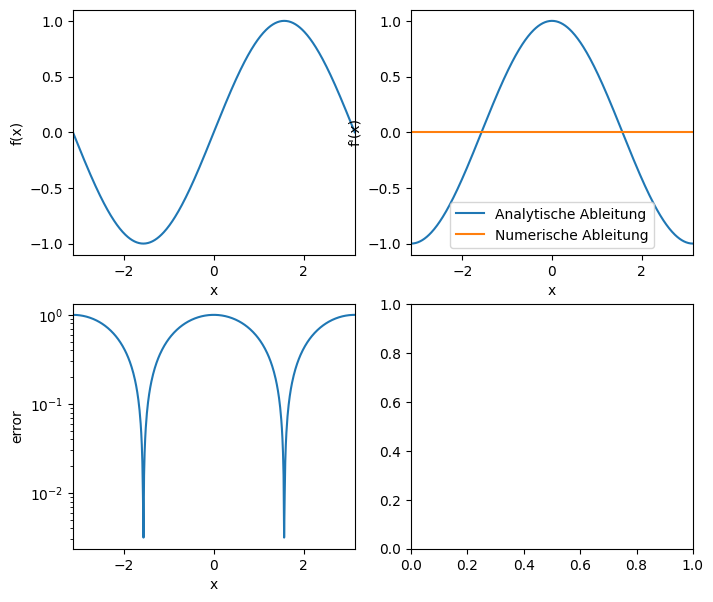

In [11]:
# Define h
h = 0.1

# Define function, analytical derivative and numerical derivative
f = lambda x: sin(x)
fp_analytical = lambda x: cos(x)  # analytiically computed derivative

### Do not change anything below this line ###

# Compute numerical derivative
fp_numerical = lambda x: derivative(f, x, h)

# Visualize results
subplots(2, 2, figsize=(8, 7))
x = linspace(-pi, pi, 500)

# First subplot: show function f
subplot(2, 2, 1)
xlim(x[0], x[-1])
xlabel("x")
ylabel("f(x)")
plot(x, f(x))

# Second subplot: show both derivatives
subplot(2, 2, 2)
xlim(x[0], x[-1])
xlabel("x")
ylabel("f'(x)")
plot(x, fp_analytical(x), label="Analytische Ableitung")
plot(x, fp_numerical(x), label="Numerische Ableitung")
legend(loc="best")

# Third subplot: show error, i.e. difference between the two derivatives
subplot(2, 2, 3)
xlim(x[0], x[-1])
xlabel("x")
ylabel("error")
diff = fp_analytical(x) - fp_numerical(x)
plot(x, abs(diff))
semilogy()

## Tangente als beste lineare Approximation

Betrachten Sie die Annäherung für $x=0$: $sin(x) \simeq x$. Geben Sie die Werte von $sin(x)$ aus für $x=0,1; 0,01; 0,001; \dots$. Können Sie einen ungefähren Wert bestimmen, bis zu dem der Fehler kleiner ist als $10^{-3}$? 

In [12]:
f = lambda x: sin(x)  # Die Funktion f
t = lambda x: x  # Die Tangente an f

for x in [1]:  # TODO: Werte fuer x eintragen
    print("f = ", f(x), ", t =", t(x), ", diff =", abs(f(x) - t(x)))

f =  0.8414709848078965 , t = 1 , diff = 0.1585290151921035


## Nullstellenbestimmung mit Newton-Verfahren

### Implementierung der Funktion

Implementieren Sie hier das Newton-Verfahren zur Bestimmung von  Nullstellen. Die Funktion dazu hat folgende Parameter: die zu untersuchende Funktion $f$, deren Ableitung $f'$, einen anfänglichen Wert $x_0$ sowie (optional) die Genauigkeit der Abbruchbedingung $\varepsilon$. Brechen Sie spätestens nach 1000 Schritten die Berechnung ab.
Rückgabewerte sollen die Position der Nullstelle, der Funktionswert an dieser Stelle sowie die Anzahl an durchgeführten Schritten sein.

Zum Testen können Sie die weiter unten definierte Funktion nutzen.

In [13]:
def Newton(f, fp, x0, eps=1e-4):
    n = 0
    return x0, f(x0), n

### Erster Test
Für einen ersten Test verwenden wir die Funktion $f(x)=x^5 - x^3 - 2*x^2 - 4$, die erwartete Nullstelle ist $x=1,71827$.

In [22]:
f = lambda x: x**5 - x**3 - 2 * x**2 - 4
fp = lambda x: 5 * x**4 - 3 * x**2 - 4 * x

x0, fx0, n = Newton(f, fp, 1)
print("x0 =", x0, ", f(x0) =", fx0, ", nIter =", n)

x0 = 1.7182669508873492 , f(x0) = 1.2914062245350522e-05 , nIter = 20


### Nullstellenbestimmung

Ermitteln Sie mit Ihrer oben definierten Funktion `Newton` die Nullstellen der folgenden Funktionen bzw. die Lösung der Gleichung (auf 2 Nachkommastellen genau):
1. $f(x) = e^x + x - 18$ (Kontrolle: $2,7261$)
2. $f(x) = x^3 + 3x - 6$ (Kontrolle: $1,28791$)
3. $ln(x)+e^x = x^2 - 1$ (Kontrolle: $0,12078$)

Tipp 1: Für 3. stellen Sie die Gleichung so um, dass Sie auf einer Seite eine 0 stehen haben. Diese Form können Sie dann für eine Nullstellensuche nutzen.

Tipp 2: überlegen Sie mit Hilfe des Zwischenwertsatzes, wo Sie Nullstellen erwarten, um einen günstigen Anfangswert zu haben.

In [ ]:
# TODO

### Visualisierung der Konvergenz
Der folgende Abschnitt definiert eine Funktion um die Konvergenz des Newton-Verfahrens zu visualisieren.

* Blau: Funktion f
* Gelbe Punkte: Iterationsschritte $x_i$
* Grau gestrichelte Linien: Tangente bei $x_i$ und Schnittpunkt mit x-Achse

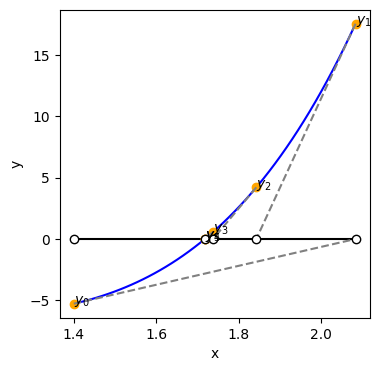

In [72]:
def newton_convergence(f, fp, x0, eps=1e-2):
    steps = [x0]  # steps taken by the Newton algorithm
    while abs(f(x0)) > eps and len(steps) < 1000:
        x0 = x0 - f(x0) / fp(x0)  # one Newton iteration
        steps.append(x0)
    steps = array(steps)  # convert to numpy array for easier handling
    fig, ax = subplots(figsize=(4, 4))
    xlabel("x")
    ylabel("y")
    x = linspace(min(steps), max(steps))
    plot(x, f(x), "b")  # blue line: the function itself
    plot(x, zeros(len(x)), "-k")  # black line for y=0
    plot(steps, f(steps), "o", c="orange")  # steps with orange bullets
    for i in range(len(steps)):
        s = steps[i]
        ax.annotate("$y_{{{:d}}}$".format(i), xy=(s, f(s)), xycoords="data")
    for i in range(len(steps) - 1):
        x0 = steps[i]
        x1 = steps[i + 1]
        # dashed grey lines showing the tangent
        plot([x0, x1], [f(x0), 0], "--", c="grey")
        # open circles showing the intersection of tangent and x axis
        plot([x0], [0], "o", mfc="w", mec="k")


newton_convergence(f, fp, 1.4)

Plotten Sie jetzt die Konvergenz der drei im Abschnitt "Nullstellenbestimmung" definierten Funktionen.

In [ ]:
# TODO: Plotten Sie die Konvergenz

### Newton Verfahren in Python
Das Newton-Verfahren ist in der Numerik ein Standardverfahren, daher gibt es natürlich eine Implementierung in Python, diese findet sich in scipy.optimize.fsolve. Recherchieren Sie die Benutzung von fsolve und wiederholen Sie die Berechnung der Nullstellen mit fsolve. Wieso benötigt fsolve nicht zwingend die Angabe der 1. Ableitung?

In [100]:
from scipy.optimize import fsolve

f = lambda x: exp(x)+x-18
# TODO: finden Sie die Nullstellen der Funktion mit der Funktion fsolve

## Extremwertprobleme

### Numerische Lösung von Extremwertproblemen
Durch Kombintion von Newton-Verfahren mit Ableitungen können Sie Extremwertprobleme für Funktionen lösen, für die keine analytische Lösung möglich ist. 

Betrachten Sie die Funktion $f(x)=e^x - x^3$ und berechnen Sie die Ableitung. Plotten Sie zunächst die Funktion sowie ihre Ableitung, um zu erkennen, wie viele lokale Extremstellen die Funktion hat (Tipp: es sind 3).


In [101]:
f = lambda x: exp(x) - x**3
f1 = lambda x: 0 # TODO: Berechnen Sie die Ableitung

# TODO: Plotten Sie die Funktion sowie ihre erste Ableitung

Nachdem Sie jetzt einen Eindruck davon haben, wo die Extremwerte der Funktion sein könnten, berechnen Sie diese. Analytisch ist das nicht möglich, nutzen Sie daher das Newton-Verfahren.

In [102]:
# TODO: Berechnen Sie die Nullstellen der ersten Ableitung mit dem Newton-Verfahren

### Die optimale Form einer Konservendose
Welche Form hat eine zylindrische Konservendose mit 1 Liter Inhalt und minimaler Oberfläche. Anders gefragt: wie groß sind Radius und Höhe einer Dose mit 1 l Volumen und minimalem Materialverbrauch?

Das Volumen des Zylinders ist $V(h,r)=\pi\cdot r^2\cdot h$, die Oberfläche ist (zweimal Grundfläche plus Mantelfläche) $O(h,r)=2\pi r^2 + 2\pi r h$.
Durch Einsetzen der Bedingung $V=1$ erhält man $O(r)=2(\pi r^2  + \frac 1r)$.
<img src="zylinder.png" alt="Zylinder" width="150px">

Plotten Sie die Funktion $O(r)$ und veranschaulichen Sie sich, wie das benötigte Material mit der Höhe bzw. dem Radius zusammenhängt.

In [ ]:
# TODO: definieren und plotten Sie O(r)

Lösen Sie jetzt das Extremwertproblem, indem Sie numerisch die Ableitung von O(r) bestimmen und die Nullstellen der Ableitung numerisch mit dem Newton-Verfahren berechnen.  Welche Werte erhalten Sie für r und h?

In [1]:
# TODO: loesen Sie das Extremwertproblem und berechnen Sie h und r